<a href="https://colab.research.google.com/github/botkin92/Data_analysis_algorithms/blob/lesson_4/Lesson_4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np

Реализация из методички:

In [7]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [8]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [9]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [10]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [11]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [12]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [13]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [14]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [15]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

1. В коде из методички реализуйте один или несколько из критериев останова (количество листьев, количество используемых признаков, глубина дерева и т.д.)

Реализуем ограничение максимальной глубины дерева

In [16]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth, cur_depth=0):

    if max_depth <= cur_depth:
        quality, t, index = find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        cur_depth += 1
        true_branch = build_tree(true_data, true_target, max_depth, cur_depth)
        false_branch = build_tree(false_data, false_target, max_depth, cur_depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)

2. Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, и критерий Джини на дисперсию значений.

In [17]:
# Реализуем класс узла

class Node_reg:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [18]:
# И целевое значение терминального узла (листа)

class Leaf_reg:
    
    def __init__(self, data, target):
        self.data = data # значения признаков
        self.target = target  # y_true
        self.prediction = self.predict()  # y_pred
        
    def predict(self):
        prediction = np.mean(target)
        return prediction

In [19]:
# Расчет критерия для регрессии

def dispers(target):  # np.var(target)
    mean_target = np.mean(target)
    criterion = np.sum((x - mean_target) ** 2 for x in target) / target.shape[0] 
    return criterion


In [20]:
# Расчет качества

def quality_reg(left_target, right_target, current_criter):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_target.shape[0]) / (left_target.shape[0] + right_target.shape[0])
    
    return current_criter - p * dispers(left_target) - (1 - p) * dispers(right_target)

In [21]:
# Разбиение датасета в узле

def split_reg(data, target, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_target = target[left]
    false_target = target[right]
        
    return true_data, false_data, true_target, false_target

In [22]:
# Нахождение наилучшего разбиения

def find_best_split_reg(data, target):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_criter = dispers(target)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_target, false_target = split_reg(data, target, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_target, false_target, current_criter)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [23]:
# Построение дерева с помощью рекурсивной функции

def build_tree_reg(data, target): # , max_depth, cur_depth=0):

    quality, t, index = find_best_split_reg(data, target)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf_reg(data, target)

    true_data, false_data, true_target, false_target = split_reg(data, target, index, t)

    # Рекурсивно строим два поддерева с условием
    # if max_depth <= cur_depth:
    #     cur_depth += 1
    true_branch = build_tree_reg(true_data, true_target) #, max_depth, cur_depth)
    false_branch = build_tree_reg(false_data, false_target) #, max_depth, cur_depth)
        
    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node_reg(index, t, true_branch, false_branch)

In [24]:
# Проход объекта по дереву для его классификации

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf_reg): # проверка текущий узел это лист?
        answer = node.prediction # считаем прогноз для листа
        return answer

    if obj[node.index] <= node.t: # если значение признака меньше порога t
        return classify_object(obj, node.true_branch) # рекурсия: отправляем объект в true-ветку
    else:
        return classify_object(obj, node.false_branch) # рекурсия: отправляем объект в false-ветку

In [25]:
# Предсказание деревом для всего датасета

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree) # определяем ветки для объектов
        classes.append(prediction)
    return classes

In [26]:
data, target = datasets.make_regression(n_samples=100, n_features=2)

In [27]:
# разделим сгенерированные данные на две выборки: тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=10)

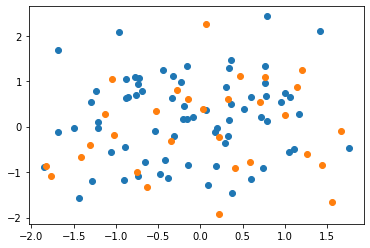

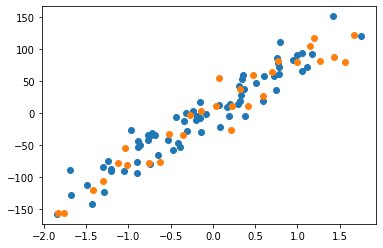

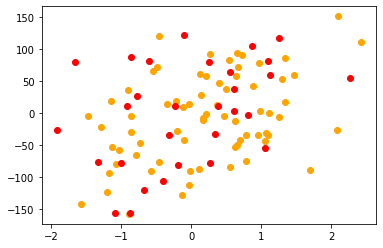

In [28]:
# визуализируем сгенерированные данные
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)
plt.show()

plt.scatter(X_train[:,1], y_train, color='orange')
plt.scatter(X_test[:,1], y_test, color='red')
plt.show()

In [29]:
# Построим дерево по обучающей выборке
my_tree2 = build_tree_reg(X_train, y_train) #, 4)
# print(my_tree2)
# display(my_tree2.index, my_tree2.t, my_tree2.true_branch , my_tree2.false_branch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


In [30]:
# Напечатаем ход нашего дерева
def print_tree_reg(Node_reg, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(Node_reg, Leaf_reg):
        print(spacing + "Прогноз:", Node_reg.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(Node_reg.index))
    print(spacing + 'Порог', str(Node_reg.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree_reg(Node_reg.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на отрицательном поддереве
    print (spacing + '--> False:')
    print_tree_reg(Node_reg.false_branch, spacing + "  ")
    
print_tree_reg(my_tree2)

Индекс 0
Порог 0.1842806458853537
--> True:
  Индекс 0
  Порог -0.8947909428048031
  --> True:
    Индекс 0
    Порог -1.2874467229216902
    --> True:
      Прогноз: -4.206280310366197
    --> False:
      Прогноз: -4.206280310366197
  --> False:
    Индекс 0
    Порог -0.38464741647776723
    --> True:
      Индекс 1
      Порог 0.6489059041951224
      --> True:
        Прогноз: -4.206280310366197
      --> False:
        Прогноз: -4.206280310366197
    --> False:
      Индекс 1
      Порог 0.16890235168002937
      --> True:
        Прогноз: -4.206280310366197
      --> False:
        Прогноз: -4.206280310366197
--> False:
  Индекс 0
  Порог 0.7459863488292642
  --> True:
    Индекс 1
    Порог 0.1380649245021415
    --> True:
      Прогноз: -4.206280310366197
    --> False:
      Прогноз: -4.206280310366197
  --> False:
    Индекс 0
    Порог 1.0490109859507488
    --> True:
      Прогноз: -4.206280310366197
    --> False:
      Прогноз: -4.206280310366197


In [31]:
# Получим ответы для обучающей выборки 
train_answers = predict(X_train, my_tree2)
train_answers[:5]

[-4.206280310366197,
 -4.206280310366197,
 -4.206280310366197,
 -4.206280310366197,
 -4.206280310366197]

In [32]:
# И получим ответы для тестовой выборки
answers = predict(X_test, my_tree2)
answers[:5]

[-4.206280310366197,
 -4.206280310366197,
 -4.206280310366197,
 -4.206280310366197,
 -4.206280310366197]